In [1]:
%matplotlib notebook

# Summary
This notebook briefly outlines the model behind the `srp_tracing` package and provides guidelines for calculation setup. Potential limitations of the model are also briefly mentioned.

# Introduction
`srp_tracing` provides a fast ray tracing solver based on the shortest ray path (SRP) principle, belonging to the wider family of Dijkstra methods. The model was created with the intention to be used in ultrasonic tomography and a number of choices have been made to make that task simpler. Consequently, it may not be possible to model every setup straight out of the box.

# The model
The model works for 2D domains. The domain is discretised into a number of cells (or pixels), each of which has its individual material property assigned. Whilst it is possible to attach a number of properties, only local homogenised material orientation is used and tested here. The user also defines the number and the location of sources and receivers.

For the purpose of ray tracing the boundaries between cells are seeded with a user-specified number of seeds. The number of seeds per edge defines the angular resolution of the solver. The rays are allowed to pass between the seeds of their parent cell only, i.e. skiping a cell or jumping a few cells forward is not allowed. This is how the graph underlying the shortest ray path tracing is constructed. Edges of the graph link the seeds within one cell only. However, each seed links to all its adjacent cells.

The cost of passing along the edges of the graph is calculated based on the wave propagation phenomenon. The local material properties are used to compute the group slowness curves determining how fast the energy propagates throguh a cell given the direction of the ray. Though it is possible to base the calculation on phase slowness curves, it is usually more appropriate to look at the group slowness which links directly to how the energy travels through the medium and can be easily linked to measured or simulated time histories.

For each edge within the cell the cost is calculated based on the local orientation, the ray angle (defined by the grid layout) and the aforementioned group slowness. A fully described graph is then input to a `scipy`'s `shortest_path` function which solves the graph. Using a pre-combiled solver improves both the speed and reliability of ray tracing. In most cases only times of flight of interest and these are obtained by default as an array of the dimensions (targets, sources). If needed, ray paths can also be extracted using a flag in the `solve` function.

# Comments
It is absolutely essential to make sure that the position of the sources with respect to the material map is carefuly verified and agrees with the experimental or numerical setup used alongside `srp_tracing`. This is controlled by both dimension of the material map and the `cx`. `cy` parameters locating the material map in the physical space.

# Validation
Four validation cases are computed against time-domain finite element simulations. All of them correspond to an austenitic weld scenario, with different material maps:
* single orientation angle (one orientation for all cells)
* Ogilvy orientation map
* MINA map
* arbitrary map obtained from a numerical analysis of a metallographic image

The results of the comparison for a few sources are presented below.

100%|██████████| 1260/1260 [00:03<00:00, 339.03it/s]


<IPython.core.display.Javascript object>


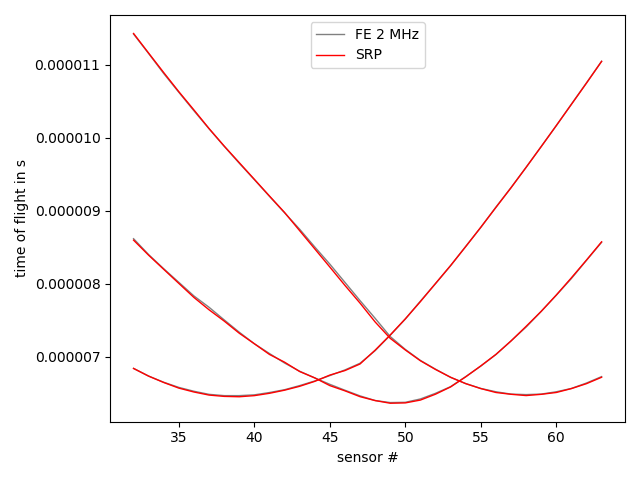

In [2]:
%run ../tests/test_anisotropic.py

------Ogilvy model setup------
Tangent parameter T: 2
Rate of change along the z-axis: 1.3
Weld thickness: 36.8
Chamfer base: 1.0
Chamfer top: 40
----------------------------


/media/michal/MKK_data/mCloud/projects/ADVISE/ogilvy_weld/ogilvy/ogilvy_model.py:164: RuntimeWarning: invalid value encountered in less
  self.grain_orientations[self.grain_orientations < -np.pi/2] += np.pi
/media/michal/MKK_data/mCloud/projects/ADVISE/ogilvy_weld/ogilvy/ogilvy_model.py:165: RuntimeWarning: invalid value encountered in greater
  self.grain_orientations[self.grain_orientations > np.pi/2] -= np.pi
/media/michal/MKK_data/mCloud/projects/ADVISE/ogilvy_weld/ogilvy/ogilvy_model.py:207: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  neighbours = self.grain_orientations_full[ind]
100%|██████████| 1260/1260 [00:03<00:00, 350.29it/s]


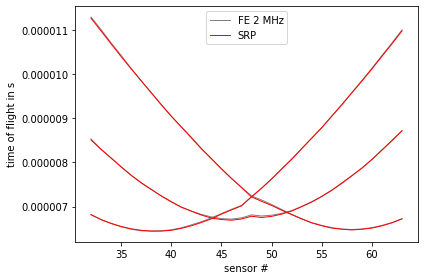

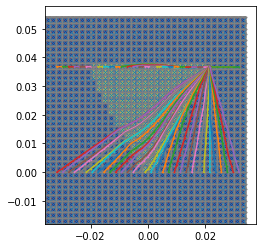

In [3]:
%run ../tests/test_ogilvy.py

100%|██████████| 1260/1260 [00:03<00:00, 338.04it/s]


<IPython.core.display.Javascript object>


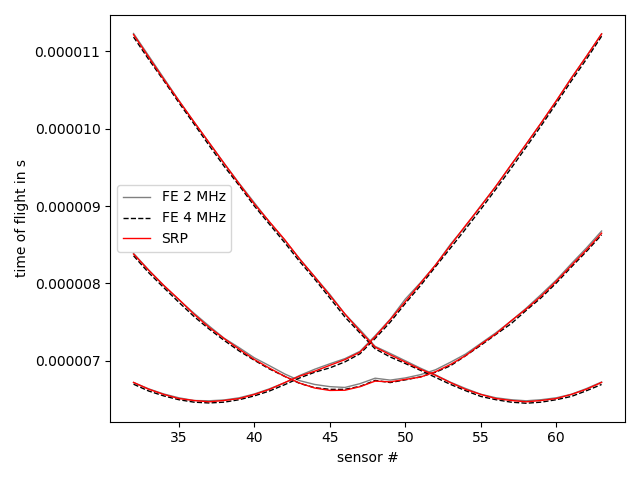

In [9]:
%run ../tests/test_mina.py

100%|██████████| 1260/1260 [00:03<00:00, 362.07it/s]


<IPython.core.display.Javascript object>


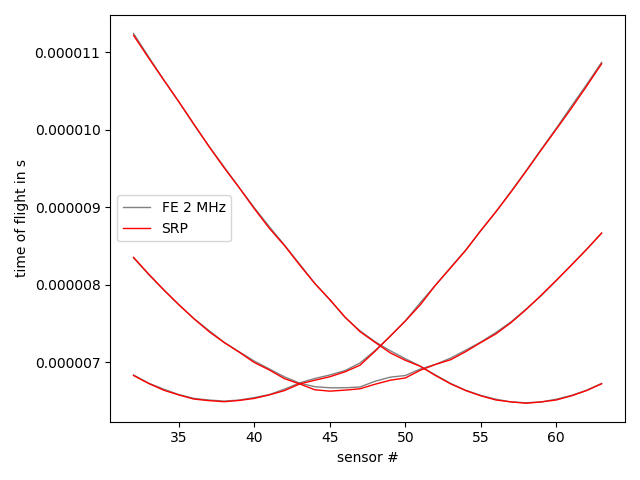

In [8]:
%run ../tests/test_arbitrary_map.py